**Importing Required Libraries**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Data Preparation**

In [2]:
df = pd.read_csv('Temp_Data.csv')
df

,YEAR,MO,DY,HR,Temp
0,2022,1,1,0,7.99
1,2022,1,1,1,7.71
2,2022,1,1,2,7.39
3,2022,1,1,3,7.21
4,2022,1,1,4,7.20
...,...,...,...,...,...
763,2022,2,1,19,-4.28
764,2022,2,1,20,-4.37
765,2022,2,1,21,-4.03
766,2022,2,1,22,-3.31


In [3]:
df = df.iloc[:,-1]
df

0      7.99
1      7.71
2      7.39
3      7.21
4      7.20
       ... 
763   -4.28
764   -4.37
765   -4.03
766   -3.31
767   -2.57
Name: Temp, Length: 768, dtype: float64

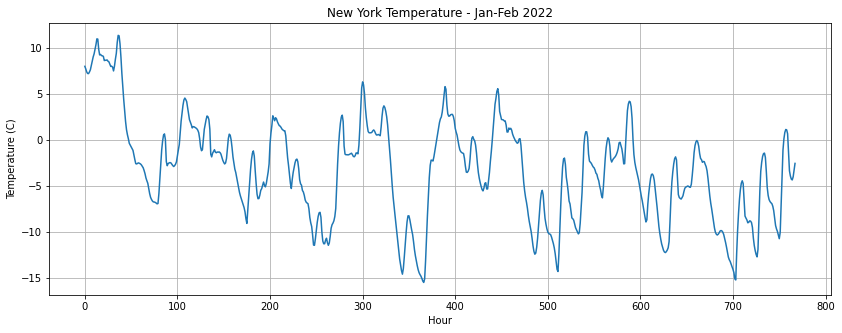

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df)
plt.title('New York Temperature - Jan-Feb 2022')
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.show()

In [5]:
train = df.iloc[:744].values
test = df.iloc[744:].values

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
train_N = scaler.fit_transform(train.reshape(-1,1))

In [9]:
train_N

array([[0.87462798],
       [0.86421131],
       [0.85230655],
       [0.84561012],
       [0.8452381 ],
       [0.85193452],
       [0.8608631 ],
       [0.87834821],
       [0.89508929],
       [0.9125744 ],
       [0.92485119],
       [0.9438244 ],
       [0.96205357],
       [0.9858631 ],
       [0.98474702],
       [0.94308036],
       [0.92075893],
       [0.92261905],
       [0.91815476],
       [0.91703869],
       [0.91517857],
       [0.89806548],
       [0.89918155],
       [0.89918155],
       [0.90066964],
       [0.89546131],
       [0.89285714],
       [0.88355655],
       [0.87425595],
       [0.875     ],
       [0.87127976],
       [0.85602679],
       [0.87537202],
       [0.90327381],
       [0.92708333],
       [0.97172619],
       [1.        ],
       [0.99813988],
       [0.96540179],
       [0.91145833],
       [0.84561012],
       [0.7905506 ],
       [0.73995536],
       [0.69456845],
       [0.65104167],
       [0.61830357],
       [0.59784226],
       [0.581

In [10]:
train_N = torch.Tensor(train_N)
train_N

tensor([[0.8746],
        [0.8642],
        [0.8523],
        [0.8456],
        [0.8452],
        [0.8519],
        [0.8609],
        [0.8783],
        [0.8951],
        [0.9126],
        [0.9249],
        [0.9438],
        [0.9621],
        [0.9859],
        [0.9847],
        [0.9431],
        [0.9208],
        [0.9226],
        [0.9182],
        [0.9170],
        [0.9152],
        [0.8981],
        [0.8992],
        [0.8992],
        [0.9007],
        [0.8955],
        [0.8929],
        [0.8836],
        [0.8743],
        [0.8750],
        [0.8713],
        [0.8560],
        [0.8754],
        [0.9033],
        [0.9271],
        [0.9717],
        [1.0000],
        [0.9981],
        [0.9654],
        [0.9115],
        [0.8456],
        [0.7906],
        [0.7400],
        [0.6946],
        [0.6510],
        [0.6183],
        [0.5978],
        [0.5818],
        [0.5632],
        [0.5562],
        [0.5499],
        [0.5428],
        [0.5346],
        [0.5149],
        [0.4974],
        [0

In [11]:
train_N = torch.Tensor(train_N).view(-1)
train_N

tensor([0.8746, 0.8642, 0.8523, 0.8456, 0.8452, 0.8519, 0.8609, 0.8783, 0.8951,
        0.9126, 0.9249, 0.9438, 0.9621, 0.9859, 0.9847, 0.9431, 0.9208, 0.9226,
        0.9182, 0.9170, 0.9152, 0.8981, 0.8992, 0.8992, 0.9007, 0.8955, 0.8929,
        0.8836, 0.8743, 0.8750, 0.8713, 0.8560, 0.8754, 0.9033, 0.9271, 0.9717,
        1.0000, 0.9981, 0.9654, 0.9115, 0.8456, 0.7906, 0.7400, 0.6946, 0.6510,
        0.6183, 0.5978, 0.5818, 0.5632, 0.5562, 0.5499, 0.5428, 0.5346, 0.5149,
        0.4974, 0.4807, 0.4795, 0.4821, 0.4840, 0.4821, 0.4799, 0.4762, 0.4699,
        0.4643, 0.4531, 0.4401, 0.4230, 0.4115, 0.4014, 0.3813, 0.3597, 0.3445,
        0.3359, 0.3296, 0.3259, 0.3255, 0.3240, 0.3214, 0.3181, 0.3196, 0.3597,
        0.4174, 0.4792, 0.5357, 0.5725, 0.5964, 0.6012, 0.5785, 0.4888, 0.4725,
        0.4814, 0.4836, 0.4851, 0.4836, 0.4784, 0.4728, 0.4691, 0.4728, 0.4788,
        0.4888, 0.5141, 0.5365, 0.5580, 0.6038, 0.6529, 0.6868, 0.7169, 0.7385,
        0.7463, 0.7403, 0.7318, 0.7068, 

In [12]:
WS = 24        # [1,2,3,...,24] ---> [25]  / [2,3,4,...,25] ---> [26]
X_train = [] 
y_train = []

for i in range(len(train_N)-WS):
  X_train.append(train_N[i:i+WS]) # train_N[1:25]
  y_train.append(train_N[i+WS:i+WS+1]) # train_N[25:26]

In [13]:
y_train

[tensor([0.9007]),
 tensor([0.8955]),
 tensor([0.8929]),
 tensor([0.8836]),
 tensor([0.8743]),
 tensor([0.8750]),
 tensor([0.8713]),
 tensor([0.8560]),
 tensor([0.8754]),
 tensor([0.9033]),
 tensor([0.9271]),
 tensor([0.9717]),
 tensor([1.]),
 tensor([0.9981]),
 tensor([0.9654]),
 tensor([0.9115]),
 tensor([0.8456]),
 tensor([0.7906]),
 tensor([0.7400]),
 tensor([0.6946]),
 tensor([0.6510]),
 tensor([0.6183]),
 tensor([0.5978]),
 tensor([0.5818]),
 tensor([0.5632]),
 tensor([0.5562]),
 tensor([0.5499]),
 tensor([0.5428]),
 tensor([0.5346]),
 tensor([0.5149]),
 tensor([0.4974]),
 tensor([0.4807]),
 tensor([0.4795]),
 tensor([0.4821]),
 tensor([0.4840]),
 tensor([0.4821]),
 tensor([0.4799]),
 tensor([0.4762]),
 tensor([0.4699]),
 tensor([0.4643]),
 tensor([0.4531]),
 tensor([0.4401]),
 tensor([0.4230]),
 tensor([0.4115]),
 tensor([0.4014]),
 tensor([0.3813]),
 tensor([0.3597]),
 tensor([0.3445]),
 tensor([0.3359]),
 tensor([0.3296]),
 tensor([0.3259]),
 tensor([0.3255]),
 tensor([0.3240]

**Creating LSTM Model**

In [14]:
class LSTM(nn.Module):
  def __init__(self,input_size=1,hidden_size=60,output_size=1):
    super().__init__()

    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,output_size)

    self.hidden_cell = (torch.zeros(1,1,self.hidden_size),torch.zeros(1,1,self.hidden_size))

  def forward(self,input_seq):                         #(window_size,1,input_size)
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq),1,-1),self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq),-1))
    return predictions[-1]

model = LSTM()

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

**Training Stage**

In [16]:
epochs = 50

for i in range(epochs):
  optimizer.zero_grad()
  model.hidden_cell = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
  for x in X_train:
    y_pred = model(x)
  for y in y_train:
    loss = criterion(y_pred,y)
  
  loss.backward()
  optimizer.step()

  print(f'epoch: {i:2}, Loss: {loss.item():8.6f}')







epoch:  0, Loss: 0.091925
epoch:  1, Loss: 0.083063
epoch:  2, Loss: 0.074621
epoch:  3, Loss: 0.066563
epoch:  4, Loss: 0.058858
epoch:  5, Loss: 0.051482
epoch:  6, Loss: 0.044424
epoch:  7, Loss: 0.037682
epoch:  8, Loss: 0.031263
epoch:  9, Loss: 0.025194
epoch: 10, Loss: 0.019517
epoch: 11, Loss: 0.014298
epoch: 12, Loss: 0.009636
epoch: 13, Loss: 0.005669
epoch: 14, Loss: 0.002582
epoch: 15, Loss: 0.000612
epoch: 16, Loss: 0.000006
epoch: 17, Loss: 0.000882
epoch: 18, Loss: 0.002860
epoch: 19, Loss: 0.004868
epoch: 20, Loss: 0.005913
epoch: 21, Loss: 0.005771
epoch: 22, Loss: 0.004789
epoch: 23, Loss: 0.003461
epoch: 24, Loss: 0.002178
epoch: 25, Loss: 0.001160
epoch: 26, Loss: 0.000478
epoch: 27, Loss: 0.000114
epoch: 28, Loss: 0.000001
epoch: 29, Loss: 0.000061
epoch: 30, Loss: 0.000224
epoch: 31, Loss: 0.000429
epoch: 32, Loss: 0.000633
epoch: 33, Loss: 0.000804
epoch: 34, Loss: 0.000926
epoch: 35, Loss: 0.000990
epoch: 36, Loss: 0.000996
epoch: 37, Loss: 0.000948
epoch: 38, L

**Testing Stage**

In [18]:
preds = train_N[-WS:].tolist()

model.eval()

for i in range(24):
  seq = torch.Tensor(preds[-WS:])
  with torch.no_grad():
    preds.append(model(seq).item())

predictions = preds[:WS]

predictions

[0.2421875,
 0.2232142835855484,
 0.1800595223903656,
 0.1491815447807312,
 0.1287202388048172,
 0.1130952388048172,
 0.1034226194024086,
 0.1339285671710968,
 0.247023805975914,
 0.3679315447807312,
 0.4497767984867096,
 0.486235111951828,
 0.5100446343421936,
 0.5215773582458496,
 0.5234375,
 0.5059523582458496,
 0.449032723903656,
 0.3839285671710968,
 0.3519345223903656,
 0.3351934552192688,
 0.3273809552192688,
 0.3225446343421936,
 0.3188244104385376,
 0.308407723903656]

In [19]:
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
predictions

array([[ -9.01      ],
       [ -9.52000006],
       [-10.68000004],
       [-11.51000008],
       [-12.05999998],
       [-12.47999998],
       [-12.73999999],
       [-11.92000011],
       [ -8.8800001 ],
       [ -5.63000008],
       [ -3.42999966],
       [ -2.45000019],
       [ -1.81000023],
       [ -1.50000061],
       [ -1.45      ],
       [ -1.92000061],
       [ -3.45000038],
       [ -5.20000011],
       [ -6.06000004],
       [ -6.50999992],
       [ -6.71999992],
       [ -6.85000023],
       [ -6.94999985],
       [ -7.23000038]])

In [20]:
test

array([ -7.72,  -8.54,  -9.32,  -9.7 ,  -9.97, -10.35, -10.76, -10.08,
        -7.17,  -4.08,  -1.12,   0.1 ,   0.8 ,   1.12,   1.08,   0.65,
        -1.49,  -3.38,  -3.94,  -4.28,  -4.37,  -4.03,  -3.31,  -2.57])

**Evaluation**

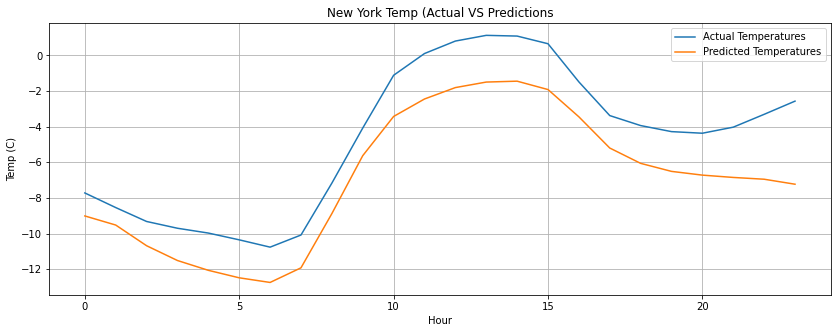

In [22]:
plt.figure(figsize=(14,5))
plt.plot(test,label='Actual Temperatures')
plt.plot(predictions, label = 'Predicted Temperatures')
plt.grid()
plt.title('New York Temp (Actual VS Predictions')
plt.xlabel('Hour')
plt.ylabel('Temp (C)')
plt.legend()
plt.show()

In [23]:
mae = torch.abs(torch.tensor(predictions)-torch.tensor(test)).mean()
print('Mean Absolute Error: ',mae.item())

Mean Absolute Error:  4.834340266717804
